In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.patches as mpatches
from physoce import tseries as ts
from scipy.signal import welch
from scipy.stats import chi2

In [7]:
#load combined file from ADV processing code
os.chdir("c:/Users/steve/Desktop/STILL1/ADV_8032017/")
filename ="combined.csv"
df = pd.read_csv(filename)

In [8]:
start_time1, end_time1 = (1401, 1421) #select start and end time of in kelp run 
start_time2, end_time2 = (1446, 1506)#select start and end time of out of bed run 
df['Time']= (df['Hour']*100)+ (df['Minute']) #make new time column for indexing in military time
runindex_in = (df['Time']>start_time1-1) & (df['Time']<end_time1+1) # index by start and end time for in bed run
runindex_out = (df['Time']>start_time2-1) & (df['Time']<end_time2+1) # index by start and end time for out of bed run

In [9]:
#use PCA to rotate axis to make variable with most variation U
theta, major, minor=ts.princax(df['Velocity_East(m/s)'], df['Velocity_North(m/s)']) #theta = angle, major = SD major axis, SD minor axis 
U, V= ts.rot(df['Velocity_East(m/s)'], df['Velocity_North(m/s)'], -theta)

In [11]:
df['U'] = U
df['V']= V

In [12]:
#make variables you want to play with 
U_in = df['U'][runindex_in]
U_out = df['U'][runindex_out]
N1 = len(U_in)
N2 = len(U_out)

<IPython.core.display.Javascript object>


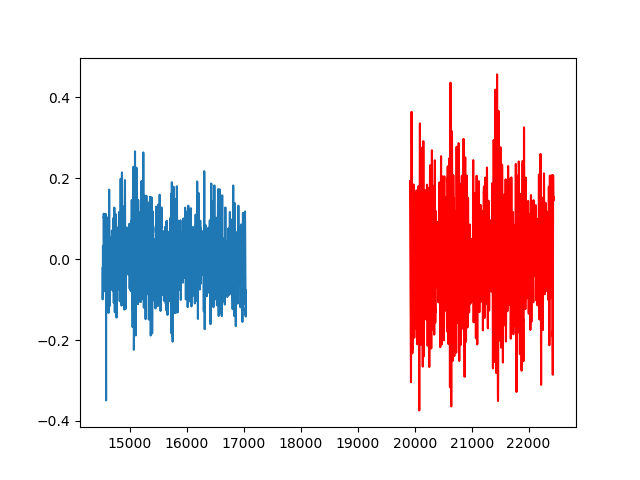

In [13]:
plt.figure()
plt.plot(U_in)
plt.plot(U_out, 'r')

plt.show()

In [15]:
U_fft_in = np.fft.fft(U_in) #Fast Fourier Transform alogorithm
U_fft_out = np.fft.fft(U_out)

<IPython.core.display.Javascript object>


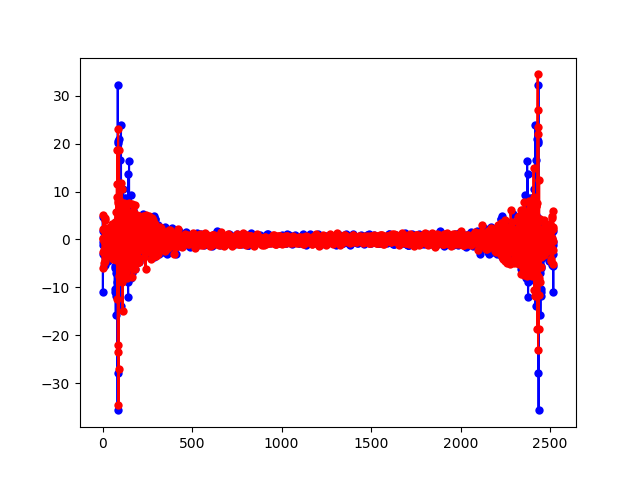

In [16]:
plt.figure()
plt.plot(np.real(U_fft_in),'b-o',markeredgecolor='none')
plt.plot(np.imag(U_fft_in),'r-o',markeredgecolor='none')
plt.show()

In [17]:
deltat1 = .5
deltat2 = .5
f_in = np.fft.fftfreq(N1,deltat1)
S_in = (2/N1)*deltat1*np.abs(U_fft_in)**2

f_out = np.fft.fftfreq(N2, deltat2)
S_out = (2/N2)*deltat2*np.abs(U_fft_out)**2

os.chdir("c:/Users/steve/Desktop/STILL1/ADV_8312017/")
filename ="combined.csv"
df = pd.read_csv(filename)
start_time2, end_time2 = (1252, 1312)#select start and end time of out of bed run 
t2 = end_time2-start_time2
df['Time']= (df['Hour']*100)+ (df['Minute']) #make new time column for indexing in military time
runindex2 = (df['Time']>start_time2-1) & (df['Time']<end_time2+1) # index by start and end time for out of bed run
velocityN_out = df['Velocity_North(m/s)'][runindex2]
N2 = len(velocityN_out)
velocityN_fft_out = np.fft.fft(velocityN_out)
deltat2 = 1/t2
f_out = np.fft.fftfreq(N2, deltat2)
S_out = (2/N2)*deltat2*np.abs(velocityN_fft_out)**2

plt.figure()
#plt.plot(velocityN_in)
plt.plot(velocityN_out, 'r')
#plt.plot(df['Velocity_North(m/s)'])
plt.show()

<IPython.core.display.Javascript object>


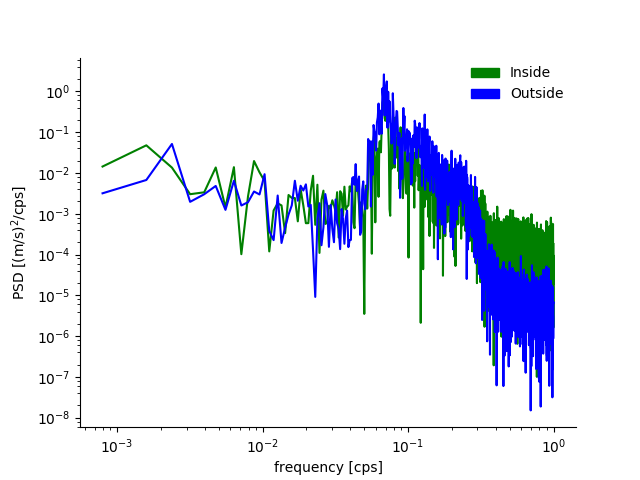

In [18]:
fig, ax = plt.subplots()

plt.loglog(f_in[0:round(N1/2)],S_in[0:round(N1/2)], 'g')
plt.loglog(f_out[0:round(N2/2)],S_out[0:round(N2/2)], 'b')
plt.xlabel('frequency [cps]')
plt.ylabel('PSD [(m/s)$^2$/cps]') #power spectral density 
green_patch = mpatches.Patch(color='green', label='Inside')
blue_patch = mpatches.Patch(color='blue', label='Outside')
plt.legend(loc = 1,bbox_to_anchor=(1, 1.01), handles=[green_patch, blue_patch], frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('run1_90stipesN.jpg', dpi=1000)
plt.show()

In [54]:
f2_in,S2_in = welch(U_in,fs=.5,nperseg=N1,window='boxcar') # boxcar
f2_out,S2_out = welch(U_out,fs=.5,nperseg=N2,window='boxcar')
f3_in, S3_in = welch(U_in,fs=.5,nperseg=N1,window='boxcar',detrend='linear')# pre-whitening 
f3_out, S3_out = welch(U_out, fs=.5, nperseg=N2, window='boxcar', detrend='linear')
f4_in,S4_in = welch(U_in,fs=.5,nperseg=N1/8,window='boxcar',detrend='linear')
f4_out,S4_out = welch(U_out,fs=.5,nperseg=N2/8,window='boxcar',detrend='linear')
x2=chi2.ppf(.05/2, N1)
print(x2)
CI  = np.log(N1/x2)
print(CI)

2382.76024551
0.0559993188278


<IPython.core.display.Javascript object>


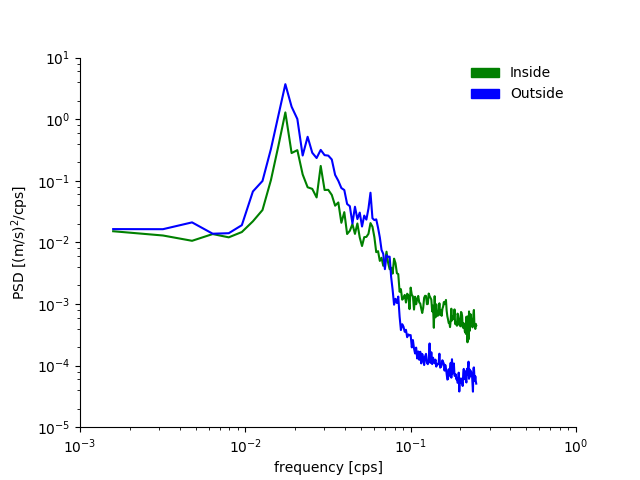

In [57]:
fig, ax = plt.subplots()

#plt.loglog(f3_in, S3_in)
plt.loglog(f4_in,S4_in, 'g')
#plt.loglog(f3_out, S3_out)
plt.loglog(f4_out, S4_out, 'b')
#ax.set_yscale('log', nonposy="clip")
plt.errorbar(.01,.05,CI)# this isn't working, it never shows 
plt.ylim([1e-5,1e1])
plt.xlim([1e-3,1])
plt.xlabel('frequency [cps]')
plt.ylabel('PSD [(m/s)$^2$/cps]') #power spectral density 
green_patch = mpatches.Patch(color='green', label='Inside')
blue_patch = mpatches.Patch(color='blue', label='Outside')
plt.legend(loc = 1,bbox_to_anchor=(1, 1.01), handles=[green_patch, blue_patch], frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('PSD waypoint 10.jpg', dpi=1000)
plt.show()


<IPython.core.display.Javascript object>


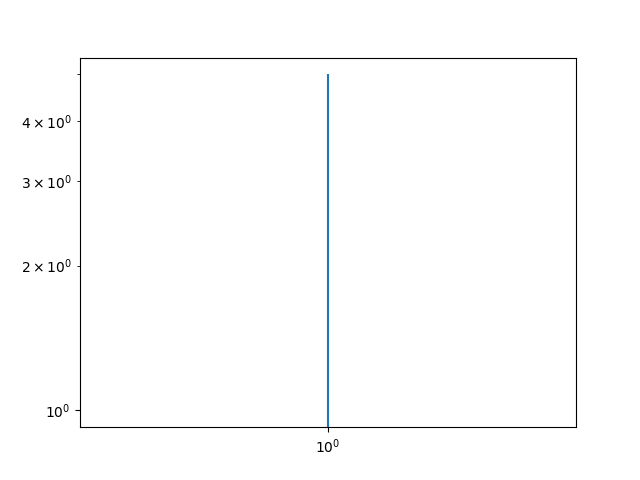

C:\Users\steve\Anaconda3\New folder\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


In [137]:
plt.figure()
plt.errorbar(1,1,4)
plt.yscale('log')
plt.xscale('log')
plt.show()